In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme('paper')

In [12]:
def calculate_completeness(row):
        return row[row['Goal_type']] /row['Goal_value']

In [ ]:
# Read Dataframe
df1 = pd.read_csv('game_overs_compact.csv')
df =df1[['device_id', 'date_time', 'level_number', 
        'end_reason', 'lives_left','n_bananavalue', 'n_distance',
        'n_specialcollectibles', 'n_swings', 'pathtrace',
        'stars','swings_left', 'time_used', 'total_duration','score']]


df = df.rename(columns={'n_bananavalue':'n_bananas'})

In [14]:
#Read level configurations
levels= pd.read_csv('levels.csv')
levels = levels.rename(columns={'lvl': 'level_number'})

In [15]:
#merge both dataframes
df_f = pd.merge(df,levels,on='level_number')

In [16]:
# calculate completeness of the level based on the level goal
df_f['completeness'] = df_f.apply(calculate_completeness, axis=1)

In [17]:
# slice the lost attempts
df_l = df_f[~df_f['end_reason'].isin(['win'])]
df_l_g =df_l.groupby(by='level_number')['completeness'].agg(['mean', 'median', 'max', 'count'])

# slice the won attempts
df_w = df_f[df_f['end_reason'].isin(['win'])]
df_w_g =df_w.groupby(by='level_number')['completeness'].agg(['mean', 'median', 'min', 'count'])

# detect false positives
fp_l= df_l[df_l['completeness'] > 1]
fp_w= df_w[df_w['completeness'] < 1]

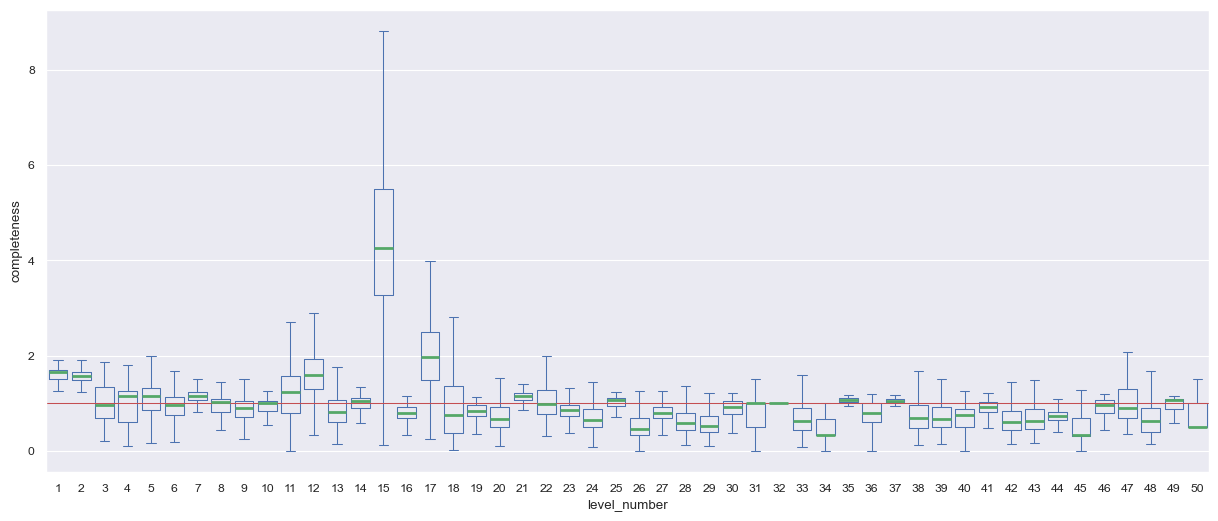

In [18]:
plt.figure(figsize=(15, 6))
chart = sns.boxplot(data=df_f, 
                    x="level_number", 
                    y="completeness",
                    medianprops={"color": "g", "linewidth": 2},
                    fill=False,
                    linewidth=.75,
                    showfliers=False)
chart.axhline(y=1, xmin=0, xmax=1, linewidth=.75, color='r')
plt.show()

In [ ]:
df_f_g = df_f.groupby(by='level_number')['completeness'].mean()

# plt.figure(figsize=(15, 6))
# barplot = sns.barplot(df_f_g)
# barplot.axhline(y=1, xmin=0, xmax=1, color='r')
# plt.show()